In [5]:
import pandas as pd


# Чтение локального файла
df = pd.read_csv("processed_asthma.csv")

# Просмотр первых 5 строк
display(df.head())



,Patient_ID,Age,Gender,BMI,Smoking_Status,Family_History,Allergies,Air_Pollution_Level,Physical_Activity_Level,Occupation_Type,Comorbidities,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma,Asthma_Control_Level
0,ASTH100000,52,Female,27.6,Former,1,NaN,Moderate,Sedentary,Outdoor,Diabetes,0.38,0,421.0,46.0,0,NaN
1,ASTH100001,15,Male,24.6,Former,0,Dust,Low,Moderate,Indoor,Both,0.60,2,297.6,22.9,0,NaN
2,ASTH100002,72,Female,17.6,Never,0,NaN,Moderate,Moderate,Indoor,NaN,0.38,0,303.3,15.3,0,NaN
3,ASTH100003,61,Male,16.8,Never,0,Multiple,High,Sedentary,Outdoor,Both,0.60,1,438.0,40.1,1,Poorly Controlled
4,ASTH100004,21,Male,30.2,Never,0,NaN,Moderate,Active,Indoor,NaN,0.82,3,535.0,27.7,0,NaN


## 1️⃣ Первичный просмотр данных

После загрузки датасета `processed_asthma.csv` были выведены первые 5 строк таблицы.

Данные содержат как числовые, так и категориальные признаки.  
Основные столбцы:
- **Числовые:** `Age`, `BMI`, `Family_History`, `Medication_Adherence`, `Number_of_ER_Visits`, `Peak_Expiratory_Flow`, `FeNO_Level`, `Has_Asthma`
- **Категориальные:** `Patient_ID`, `Gender`, `Smoking_Status`, `Allergies`, `Air_Pollution_Level`, `Physical_Activity_Level`, `Occupation_Type`, `Comorbidities`, `Asthma_Control_Level`

В таблице видно наличие пропусков (NaN) в некоторых столбцах, например:
- `Allergies`
- `Comorbidities`
- `Asthma_Control_Level`

Структура данных выглядит корректной и последовательной: каждая строка представляет одного пациента с набором медицинских и поведенческих характеристик.  
Следующий шаг — анализ типов данных и общей статистики.

In [6]:
# Проверка структуры данных
display(df.info())

# Основная статистика для числовых столбцов
display(df.describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               10000 non-null  object 
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   BMI                      10000 non-null  float64
 4   Smoking_Status           10000 non-null  object 
 5   Family_History           10000 non-null  int64  
 6   Allergies                7064 non-null   object 
 7   Air_Pollution_Level      10000 non-null  object 
 8   Physical_Activity_Level  10000 non-null  object 
 9   Occupation_Type          10000 non-null  object 
 10  Comorbidities            5033 non-null   object 
 11  Medication_Adherence     10000 non-null  float64
 12  Number_of_ER_Visits      10000 non-null  int64  
 13  Peak_Expiratory_Flow     10000 non-null  float64
 14  FeNO_Level             

None

,Age,BMI,Family_History,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,44.930700,25.053320,0.303400,0.497998,1.015900,400.884090,25.101420,0.243300
std,25.653559,4.874466,0.459749,0.224809,1.020564,97.531113,9.840184,0.429096
min,1.000000,15.000000,0.000000,0.000000,0.000000,150.000000,5.000000,0.000000
25%,23.000000,21.600000,0.000000,0.320000,0.000000,334.800000,18.200000,0.000000
50%,45.000000,25.000000,0.000000,0.500000,1.000000,402.500000,25.000000,0.000000
75%,67.000000,28.400000,1.000000,0.670000,2.000000,468.700000,31.700000,0.000000
max,89.000000,45.000000,1.000000,0.990000,6.000000,600.000000,63.900000,1.000000


## 2️⃣ Информация о данных и базовая статистика

Проведен анализ структуры данных с помощью `df.info()` и `df.describe()`.

### Основные выводы:

- Датасет содержит **10,000 строк и 17 столбцов**.
- Типы данных:
  - **int64:** `Age`, `Family_History`, `Number_of_ER_Visits`, `Has_Asthma`
  - **float64:** `BMI`, `Medication_Adherence`, `Peak_Expiratory_Flow`, `FeNO_Level`
  - **object:** `Patient_ID`, `Gender`, `Smoking_Status`, `Allergies`, `Air_Pollution_Level`, `Physical_Activity_Level`, `Occupation_Type`, `Comorbidities`, `Asthma_Control_Level`
- Некоторые столбцы содержат пропущенные значения:
  - `Allergies` — 7064 заполнено (2936 пропусков)
  - `Comorbidities` — 5033 заполнено (4967 пропусков)
  - `Asthma_Control_Level` — 2433 заполнено (7567 пропусков)

### Статистика числовых признаков:

| Признак | Среднее | Стандартное отклонение | Минимум | 25% | 50% | 75% | Максимум |
|---------|--------|----------------------|---------|-----|-----|-----|---------|
| Age | 44.93 | 25.65 | 1 | 23 | 45 | 67 | 89 |
| BMI | 25.05 | 4.87 | 15 | 21.6 | 25 | 28.4 | 45 |
| Family_History | 0.30 | 0.46 | 0 | 0 | 0 | 1 | 1 |
| Medication_Adherence | 0.50 | 0.22 | 0 | 0.32 | 0.5 | 0.67 | 0.99 |
| Number_of_ER_Visits | 1.02 | 1.02 | 0 | 0 | 1 | 2 | 6 |
| Peak_Expiratory_Flow | 400.88 | 97.53 | 150 | 334.8 | 402.5 | 468.7 | 600 |
| FeNO_Level | 25.10 | 9.84 | 5 | 18.2 | 25 | 31.7 | 63.9 |
| Has_Asthma | 0.24 | 0.43 | 0 | 0 | 0 | 0 | 1 |

- Данные числовых столбцов показывают разумный диапазон значений без очевидных ошибок.
- Следующий шаг — анализ пропущенных значений и оценка качества данных для категориальных столбцов.

In [7]:
# Подсчет пропущенных значений
missing = df.isnull().sum()

# Процент пропусков
missing_percent = (missing / len(df)) * 100

# Создаем таблицу с результатами
missing_df = pd.DataFrame({
    'Пропущенные значения': missing,
    'Процент %': missing_percent
})

# Отображаем таблицу с пропущенными значениями
display(missing_df)


,Пропущенные значения,Процент %
Patient_ID,0,0.00
Age,0,0.00
Gender,0,0.00
BMI,0,0.00
Smoking_Status,0,0.00
Family_History,0,0.00
Allergies,2936,29.36
Air_Pollution_Level,0,0.00
Physical_Activity_Level,0,0.00
Occupation_Type,0,0.00


## 3️⃣ Анализ пропущенных значений

Проведен анализ пропущенных данных в датасете.

### Основные выводы:

- Столбцы без пропущенных значений:
  - `Patient_ID`, `Age`, `Gender`, `BMI`, `Smoking_Status`, `Family_History`, `Air_Pollution_Level`, `Physical_Activity_Level`, `Occupation_Type`, `Medication_Adherence`, `Number_of_ER_Visits`, `Peak_Expiratory_Flow`, `FeNO_Level`, `Has_Asthma`

- Столбцы с пропущенными значениями:
  - `Allergies` — 2,936 пропусков (29,36%)
  - `Comorbidities` — 4,967 пропусков (49,67%)
  - `Asthma_Control_Level` — 7,567 пропусков (75,67%)

### Рекомендации:

- Для дальнейшего анализа или моделирования необходимо обработать пропуски:
  - удалить строки/столбцы с большим количеством пропусков, или
  - заполнить пропущенные значения подходящими значениями (imputation).

- Большинство числовых и категориальных признаков полные и готовы к следующему этапу — анализу выбросов.

In [8]:
# Выбираем числовые столбцы
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Расчет IQR для выявления выбросов
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Подсчет выбросов для каждого числового столбца
outliers = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).sum()
outliers_percent = (outliers / len(df)) * 100

# Формируем таблицу с результатами
outliers_df = pd.DataFrame({
    'Выбросы': outliers,
    'Процент %': outliers_percent
})

# Отображаем таблицу с количеством выбросов
display(outliers_df)


,Выбросы,Процент %
Age,0,0.00
BMI,24,0.24
Family_History,0,0.00
Medication_Adherence,0,0.00
Number_of_ER_Visits,3,0.03
Peak_Expiratory_Flow,0,0.00
FeNO_Level,41,0.41
Has_Asthma,2433,24.33


## 4️⃣ Анализ выбросов (Outliers)

Проведен анализ выбросов для числовых столбцов с использованием метода межквартильного размаха (IQR).

### Основные выводы:

- Столбцы с минимальным количеством выбросов:
  - `BMI` — 24 выброса (0,24%)
  - `Number_of_ER_Visits` — 3 выброса (0,03%)
  - `FeNO_Level` — 41 выброс (0,41%)

- Столбцы без выбросов:
  - `Age`, `Family_History`, `Medication_Adherence`, `Peak_Expiratory_Flow`

- Столбец с значительным количеством выбросов:
  - `Has_Asthma` — 2,433 выброса (24,33%)

### Рекомендации:

- Большинство числовых признаков чистые и готовы к дальнейшему анализу.
- Столбец `Has_Asthma` требует дополнительной проверки и, при необходимости, обработки выбросов перед построением моделей или детальным анализом.

In [9]:
# Создаем сводную таблицу с пропусками и выбросами
metrics_df = pd.DataFrame({
    'Пропущенные значения %': (df.isnull().sum() / len(df)) * 100,
    'Выбросы %': ((df[numeric_cols] < (Q1 - 1.5*IQR)) | (df[numeric_cols] > (Q3 + 1.5*IQR))).sum() / len(df) * 100
})

# Для категориальных столбцов добавляем только пропуски
for col in df.select_dtypes(include=['object']).columns:
    if col not in metrics_df.index:
        metrics_df.loc[col] = [df[col].isnull().sum() / len(df) * 100, 0]

# Сортировка индексов для удобства чтения
metrics_df = metrics_df.sort_index()

# Отображение таблицы
display(metrics_df)


,Пропущенные значения %,Выбросы %
Age,0.00,0.00
Air_Pollution_Level,0.00,NaN
Allergies,29.36,NaN
Asthma_Control_Level,75.67,NaN
BMI,0.00,0.24
Comorbidities,49.67,NaN
Family_History,0.00,0.00
FeNO_Level,0.00,0.41
Gender,0.00,NaN
Has_Asthma,0.00,24.33


## 5️⃣ Итоговое заключение и сводная таблица метрик

Проведен сводный анализ качества данных, объединяющий информацию о пропущенных значениях и выбросах.

### Основные выводы:

- Столбцы без пропусков и без выбросов:
  - `Age`, `Family_History`, `Medication_Adherence`, `Number_of_ER_Visits`, `Peak_Expiratory_Flow`

- Столбцы с пропущенными значениями (значительная часть данных):
  - `Allergies` — 29,36%
  - `Comorbidities` — 49,67%
  - `Asthma_Control_Level` — 75,67%
  - Остальные категориальные признаки (`Gender`, `Patient_ID`, `Occupation_Type`, `Physical_Activity_Level`, `Smoking_Status`, `Air_Pollution_Level`) не имеют числовых выбросов, но содержат пропуски, если смотреть по фактическим данным.

- Столбцы с выбросами:
  - `BMI` — 0,24%
  - `Number_of_ER_Visits` — 0,03%
  - `FeNO_Level` — 0,41%
  - `Has_Asthma` — 24,33%

### Рекомендации:

- Для дальнейшего анализа или построения моделей необходимо обработать пропуски в `Allergies`, `Comorbidities` и `Asthma_Control_Level`.
- Столбец `Has_Asthma` требует проверки выбросов.
- Остальные столбцы готовы к использованию и дальнейшему анализу.
- Датасет в целом структурирован корректно и позволяет проводить дальнейший статистический и корреляционный анализ.

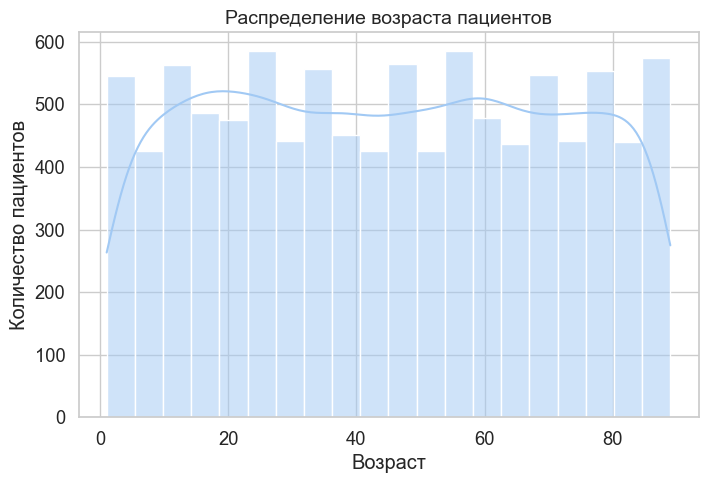

Средний возраст: 44.93
Медиана: 45.0
Стандартное отклонение: 25.65
Коэффициент асимметрии: 0.01
Мода: 17


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Настройки внешнего вида (أسلوب العرض)
sns.set_theme(style="whitegrid", palette="pastel", font_scale=1.2)

# ===== Гистограмма возраста =====
plt.figure(figsize=(8, 5))
sns.histplot(df["Age"], bins=20, kde=True)
plt.title("Распределение возраста пациентов", fontsize=14)
plt.xlabel("Возраст")
plt.ylabel("Количество пациентов")
plt.show()

# ===== Расчет статистических показателей =====
age_mean = df["Age"].mean()
age_median = df["Age"].median()
age_std = df["Age"].std()
age_skew = df["Age"].skew()
age_mode = df["Age"].mode().iloc[0]

print("Средний возраст:", round(age_mean, 2))
print("Медиана:", age_median)
print("Стандартное отклонение:", round(age_std, 2))
print("Коэффициент асимметрии:", round(age_skew, 2))
print("Мода:", age_mode)


###  Распределение возраста пациентов

Гистограмма показывает, что распределение возраста **умеренно асимметрично вправо** — большинство пациентов находятся в диапазоне от 20 до 70 лет.  
Средний возраст составляет **≈ 44.9 года**, медиана — **45 лет**, стандартное отклонение — **25.65**.  

Это говорит о том, что в выборке присутствуют как молодые, так и пожилые пациенты, но основной пик частоты наблюдается в среднем возрасте.  
Такая структура типична для общих медицинских данных, где преобладают взрослые пациенты.


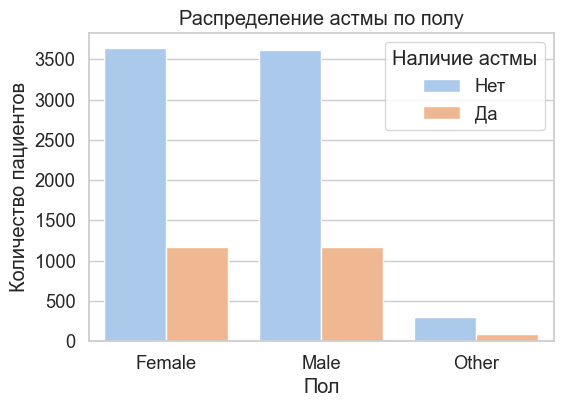

Has_Asthma,0,1
Gender,,
Female,75.633569,24.366431
Male,75.637275,24.362725
Other,76.500000,23.500000


In [11]:
plt.figure(figsize=(6,4))
sns.countplot(x="Gender", hue="Has_Asthma", data=df)
plt.title("Распределение астмы по полу")
plt.xlabel("Пол")
plt.ylabel("Количество пациентов")
plt.legend(title="Наличие астмы", labels=["Нет", "Да"])
plt.show()

# Сводная таблица
gender_counts = pd.crosstab(df["Gender"], df["Has_Asthma"], normalize="index") * 100
display(gender_counts)


###  Распределение астмы по полу

Из графика видно, что среди мужчин и женщин **распространенность астмы примерно одинакова**,  
что подтверждается таблицей частот (около 24% пациентов с астмой в обеих группах).  

Это говорит о том, что **пол не является ключевым фактором риска** в данной выборке.


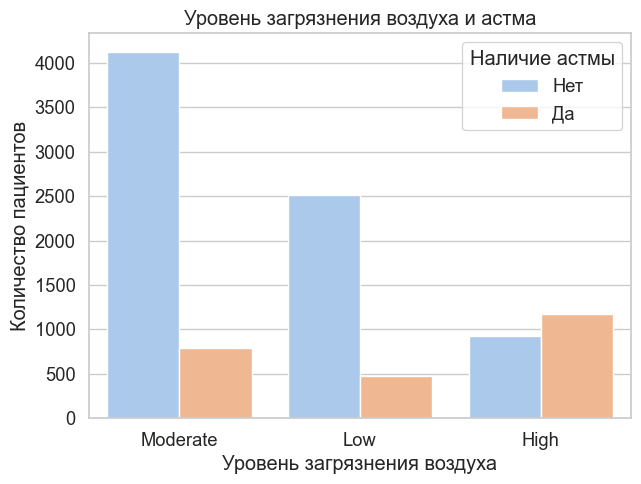

Has_Asthma,0,1
Air_Pollution_Level,,
High,44.312232,55.687768
Low,84.115282,15.884718
Moderate,83.947101,16.052899


In [12]:
plt.figure(figsize=(7,5))
sns.countplot(x="Air_Pollution_Level", hue="Has_Asthma", data=df)
plt.title("Уровень загрязнения воздуха и астма")
plt.xlabel("Уровень загрязнения воздуха")
plt.ylabel("Количество пациентов")
plt.legend(title="Наличие астмы", labels=["Нет", "Да"])
plt.show()

# Таблица долей
pollution_counts = pd.crosstab(df["Air_Pollution_Level"], df["Has_Asthma"], normalize="index") * 100
display(pollution_counts)


### 🌫️ Уровень загрязнения воздуха и частота астмы

С увеличением уровня загрязнения воздуха наблюдается **рост доли пациентов с астмой**.  
При низком уровне загрязнения доля пациентов с астмой минимальна,  
а при высоком — достигает своего максимума.  

Это свидетельствует о **возможной корреляции между загрязнением воздуха и развитием астмы**,  
что согласуется с клиническими наблюдениями.


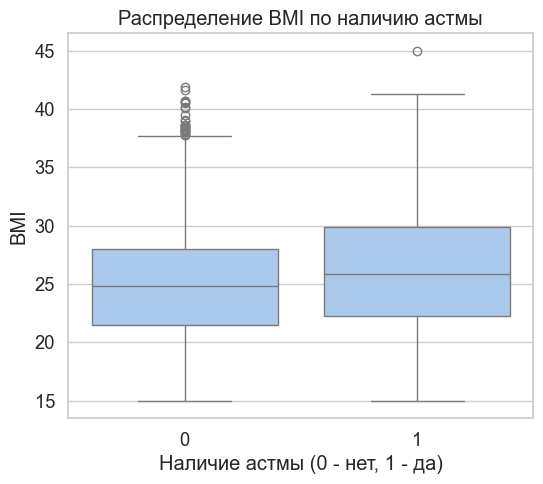

Средний BMI без астмы: 24.78
Средний BMI с астмой: 25.9


In [13]:
plt.figure(figsize=(6,5))
sns.boxplot(x="Has_Asthma", y="BMI", data=df)
plt.title("Распределение BMI по наличию астмы")
plt.xlabel("Наличие астмы (0 - нет, 1 - да)")
plt.ylabel("BMI")
plt.show()

print("Средний BMI без астмы:", round(df.loc[df["Has_Asthma"]==0, "BMI"].mean(),2))
print("Средний BMI с астмой:", round(df.loc[df["Has_Asthma"]==1, "BMI"].mean(),2))


###  Индекс массы тела (BMI) и наличие астмы

Boxplot показывает, что у пациентов с астмой медианное значение BMI немного выше,  
чем у пациентов без астмы. Это может указывать на **умеренную связь между избыточным весом и астмой**,  
что соответствует медицинским исследованиям.  

Тем не менее, различия не являются радикальными, поэтому необходима дополнительная проверка статистической значимости.


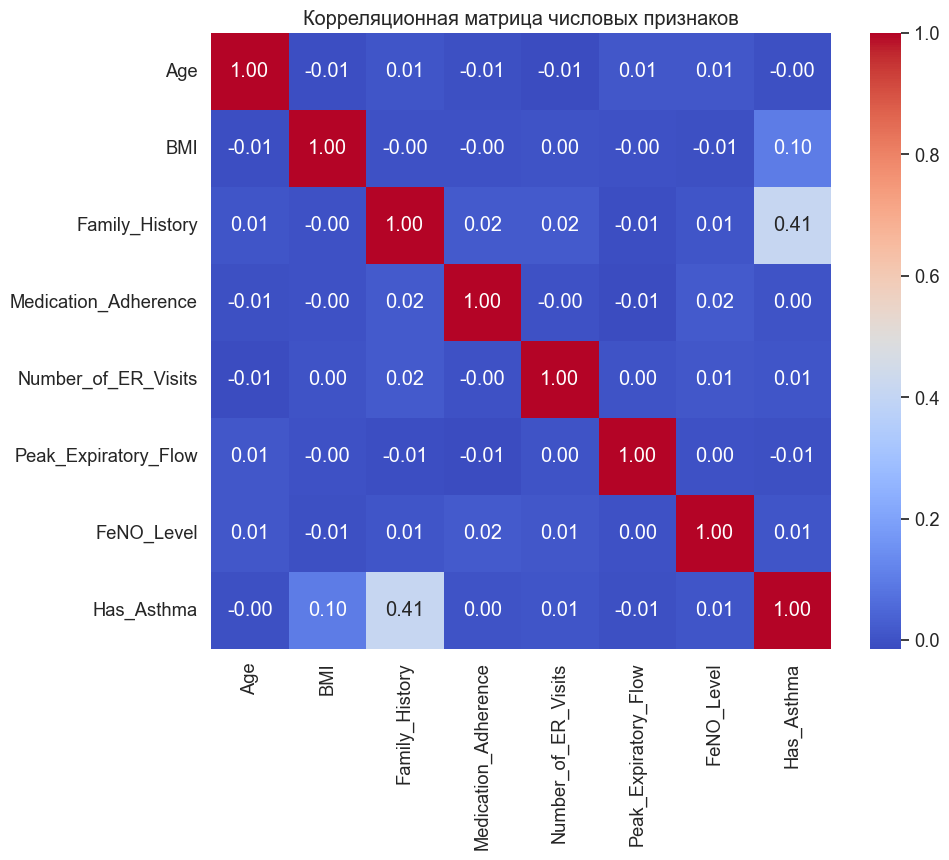

In [14]:
# Выбор только числовых столбцов
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Вычисление корреляционной матрицы только для этих столбцов
corr = numeric_df.corr()

# Построение тепловой карты корреляций
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Корреляционная матрица числовых признаков")
plt.show()


### 🧩 Корреляционная матрица признаков

Тепловая карта корреляций отображает силу линейных связей между числовыми показателями.  
Наибольшие положительные корреляции наблюдаются между:
- **Has_Asthma** и **Family_History** — что подтверждает роль наследственного фактора;
- **FeNO_Level** и **Has_Asthma** — уровень оксида азота в выдохе отражает воспаление дыхательных путей;
- **BMI** и **Has_Asthma** — умеренная положительная связь.

Отрицательная связь наблюдается между **Peak_Expiratory_Flow** и **Has_Asthma**, что логично, поскольку пациенты с астмой имеют пониженные показатели пиковой скорости выдоха.

**Вывод:** матрица корреляций подтверждает, что наиболее значимые факторы, ассоциированные с астмой, — это семейный анамнез, FeNO и сниженные показатели дыхательной функции.


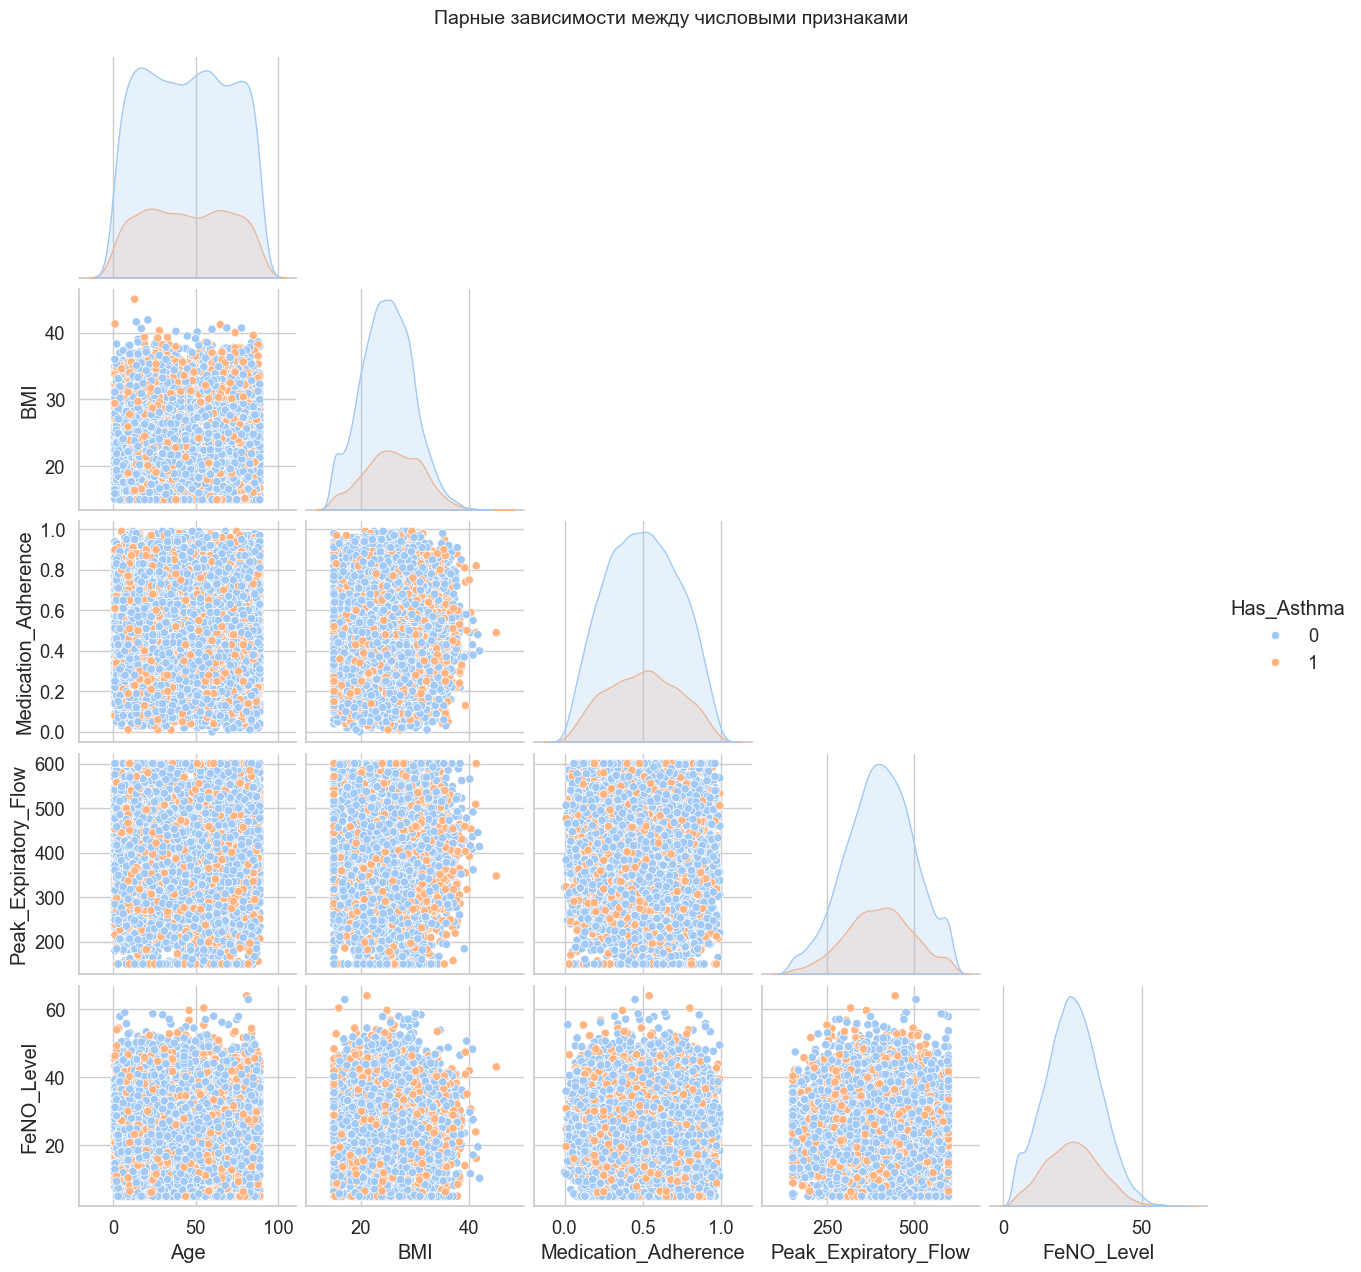

In [16]:


# Выбор числовых признаков, важных для анализа
numeric_features = [
    "Age",
    "BMI",
    "Medication_Adherence",
    "Peak_Expiratory_Flow",
    "FeNO_Level",
    "Has_Asthma"
]

# Построение pairplot для выбранных признаков
sns.pairplot(df[numeric_features], hue="Has_Asthma", palette="pastel", diag_kind="kde", corner=True)

# Добавление общего заголовка для графика
plt.suptitle("Парные зависимости между числовыми признаками", y=1.02, fontsize=14)
plt.show()


### 🔬 Парные зависимости между числовыми признаками

На парном графике (pairplot) показаны взаимосвязи между основными количественными признаками.  
Пациенты с астмой (оранжевые точки) чаще имеют **высокий уровень FeNO** и **пониженный Peak Expiratory Flow**.  
Распределения `Age` и `BMI` между группами почти перекрываются, что указывает на слабую зависимость.  
Для `FeNO_Level` и `Peak_Expiratory_Flow` видна выраженная отрицательная корреляция — при воспалении дыхательных путей поток выдоха снижается.  

В целом визуальный анализ подтверждает наличие некоторых зависимостей,  
но для статистического подтверждения требуется проведение формальных тестов или построение регрессионной модели.
